# Harris Corners Detection


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
from scipy.signal import correlate2d 

In this exercise we implement Harris Corners Detectors, following these steps:

1. Compute image gradients: Gx, Gy
2. Compute products: Gx*Gx, Gx*Gy, Gy*Gy
3. Filter products with a Gaussian window
4. For each pixel (i,j) define the matrix M 
5. For each pixel compute the score R
6. Threshold R, and perform non-maxima suppression


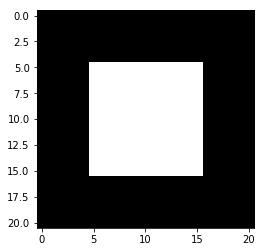

In [2]:
# lets start with some trivial image:
img = np.zeros((21,21))
img[5:-5,5:-5] = 100
plt.imshow(img, cmap='gray',interpolation='nearest')
plt.show()

### Step 1: Compute image gradients: Gx, Gy:

Use Sobel operators to calculate image gradients. Display the results.

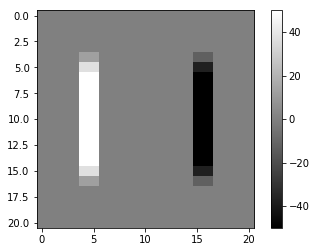

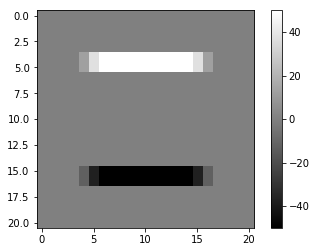

In [3]:
def filter2D(img_in, kernel):
    # check kernel dimensions
    ker_h, ker_w = kernel.shape
    if ker_h != ker_w:
        raise ValueError('expected square-size kernel')
    if ker_h % 2 == 0:
        raise ValueError('expected odd-size kernel')
    n = (ker_h - 1) // 2

    img_h, img_w = img_in.shape

    img_in_p = np.zeros((img_h + 2 * n, img_w + 2 * n))

    # add paddings
    for i in range(img_h):
        for j in range(img_w):
            img_in_p[i + n][j + n] = img_in[i][j]

    img_out = np.zeros((img_h, img_w))

    for i in range(img_h):
        for j in range(img_w):
            img_out[i][j] = (img_in_p[i:i + 2 * n + 1, j:j + 2 * n + 1] * kernel).sum()
    return img_out

sobel_x =   1/8 * np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
sobel_y = np.transpose(sobel_x)

Gx = filter2D(img,sobel_x)
Gy = filter2D(img,sobel_y)

plt.imshow(Gx,cmap = 'gray')
plt.colorbar()
plt.show()
plt.imshow(Gy,cmap = 'gray')
plt.colorbar()
plt.show()

### Step 2: Compute products: GxGx, GyGy, GxGy

and display the results..

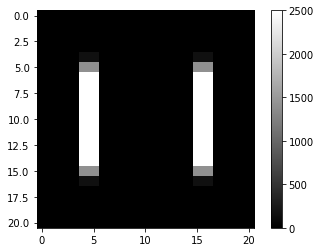

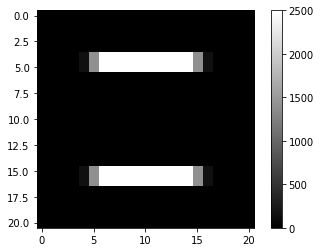

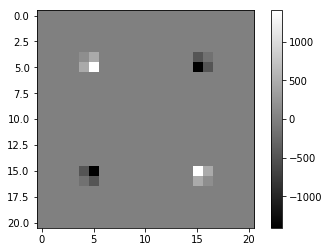

In [4]:
GxGx = Gx ** 2
GyGy = Gy ** 2
GxGy = Gx * Gy

plt.imshow(GxGx,cmap='gray')
plt.colorbar()

plt.show()
plt.imshow(GyGy,cmap='gray')
plt.colorbar()

plt.show()
plt.imshow(GxGy,cmap='gray')
plt.colorbar()

plt.show()

### Step 3: Filter products with a Gaussian window


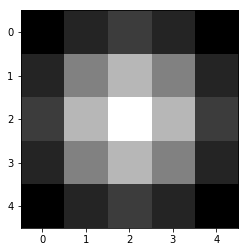

In [5]:
def gaussian(n,sigma):
    # generates a Gaussian kernel of size (2n+1)*(2n+1)
    x = np.arange(-n,n+1)
    y = np.arange(-n,n+1)
    xx, yy = np.meshgrid(x,y)
    z = np.exp(-(xx**2+yy**2)/(2*sigma**2))
    z = z/z.sum()
    return z
               
gaussian_kernel = gaussian(2,1.3)            
plt.imshow(gaussian_kernel,interpolation='nearest',cmap='gray')
plt.show()

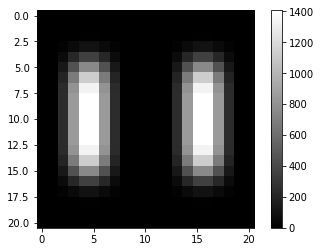

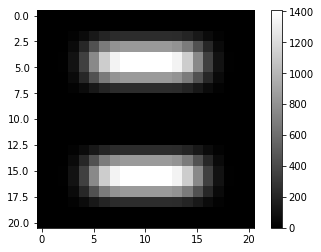

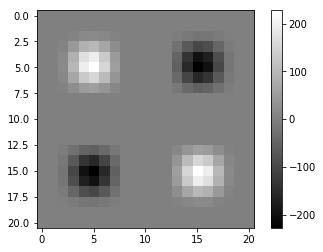

In [6]:
GxGxf = filter2D(GxGx,gaussian_kernel)
GyGyf = filter2D(GyGy,gaussian_kernel)
GxGyf = filter2D(GxGy,gaussian_kernel)

plt.imshow(GxGxf,cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(GyGyf,cmap='gray')
plt.colorbar()
plt.show()
plt.imshow(GxGyf,cmap='gray')
plt.colorbar()
plt.show()

### Steps 4+5: For each pixel $(i,j)$ calculate its Harris score R:


$R(i,j)=\mathtt{det}(M)-0.06\cdot[\mathtt{tr}(M)]^2$

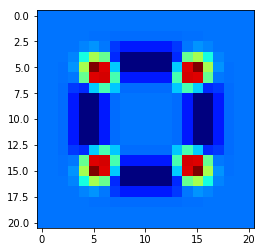

In [7]:
a = 0.06
R = ((GxGxf * GyGyf) - (GxGyf ** 2)) - (a *( (GxGxf + GyGyf) ** 2))

plt.imshow(R,cmap = plt.cm.jet)
plt.show()
# your code here..
# (try to avoid using loops here if you can..)

# display the resulting matrix R (with a matching colorbar)

### Step 6A: Threshold R
choose a threshold level and use it to threshold the matrix R. display the results. 

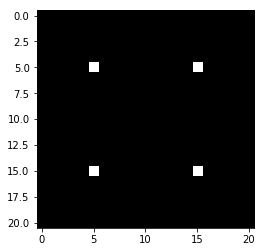

In [8]:
T_R = R > R.max() * 0.9

plt.imshow(T_R,cmap='gray')
plt.show()

### Step 6B: non-maxima suppression (NMS)
perform non-maxima suppression on the result.

mark the final selected pixels (Harris Corners) on top of the original image (np.nonzero might come handy..)

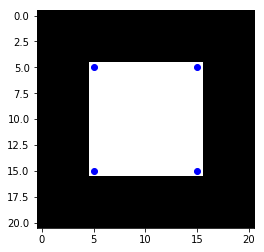

In [9]:

is_bigger = True
for i in range(1,len(R) - 1):
    for j in range(1,len(R[0]) - 1):
        is_bigger = True
        for r in range(-1,2):
            for c in range(-1,2):
                if(R[i,j] < R[i+r,j+c]):
                    is_bigger = False
        T_R[i,j] = is_bigger * R[i,j]

T_R_nms = np.zeros_like(T_R)
T_R_nms = 1
plt.imshow(img,cmap = 'gray')
plt.plot(*(np.nonzero(T_R)),'or',color = 'blue')
plt.show()


## Lets try it on some real images..

pick 3 images (either from our moodle or pick your own)

for each image, perform Harris corner detection. 
play with the free parameters (Gaussian, threshold level) until you find a satisfactory result.

plot your resuls along with the choosen parameters used to generate each of them.

## Good Luck!

gaussian = (n = 2, sigma = 1.3), threshold = 0.9


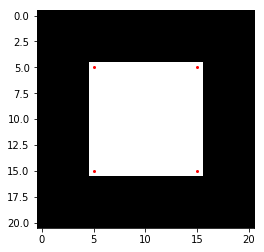

gaussian = (n = 4, sigma = 3), threshold = 0.02


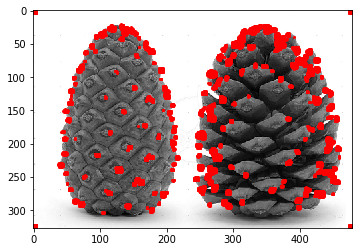

gaussian = (n = 2, sigma = 1.3), threshold = 0.2


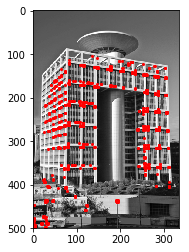

gaussian = (n = 3, sigma = 2), threshold = 0.25


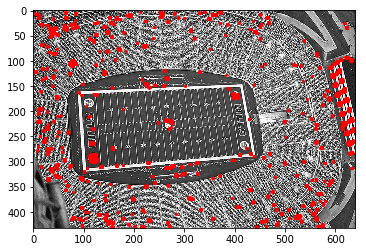

In [10]:
from skimage.io import imread

def corners(img,gaussian_kernel,threshold_level):
    
    sobel_x =   1/8 * np.array([[-1,0,1], [-2,0,2],[-1,0,1]])
    sobel_y = np.transpose(sobel_x)
    Gx = filter2D(img,sobel_x)
    Gy = filter2D(img,sobel_y)
    
    GxGx = Gx ** 2
    GyGy = Gy ** 2
    GxGy = Gx * Gy
    
    GxGxf = filter2D(GxGx,gaussian_kernel)
    GyGyf = filter2D(GyGy,gaussian_kernel)
    GxGyf = filter2D(GxGy,gaussian_kernel)
    
    a = 0.06
    R = ((GxGxf * GyGyf) - (GxGyf ** 2)) - (a *( (GxGxf + GyGyf) ** 2))

    r_max = R.max()
    T_R = R > (r_max * threshold_level)
    
    is_bigger = True
    for i in range(1,len(T_R) - 1):
        for j in range(1,len(T_R[0]) - 1):
            is_bigger = True
            for r in range(-1,2):
                for c in range(-1,2):
                    if(T_R[i,j] < T_R[i+r,j+c]):
                        is_bigger = False
            T_R[i,j] = is_bigger * T_R[i,j]

    img_corners = np.nonzero(T_R)
    return img_corners


pine = imread('pine.png',as_grey = True)
kiria = imread('kiria.jpg',as_grey = True)
football = imread('football.jpg',as_grey = True)

print('gaussian = (n = 2, sigma = 1.3), threshold = 0.9')
img_c = corners(img,gaussian(2,1.3),0.9)
plt.imshow(img,cmap='gray')
plt.plot(img_c[1],img_c[0],'or',markersize=2)
plt.show()

print('gaussian = (n = 4, sigma = 3), threshold = 0.02')
pine_c = corners(pine,gaussian(4,3),0.02)
plt.imshow(pine,cmap='gray')
plt.plot(pine_c[1],pine_c[0],'or',markersize=2)
plt.show()

print('gaussian = (n = 2, sigma = 1.3), threshold = 0.2')
kiria_c = corners(kiria,gaussian(2,1.3),0.2)
plt.imshow(kiria,cmap='gray')
plt.plot(kiria_c[1],kiria_c[0],'or',markersize=2)
plt.show()

print('gaussian = (n = 3, sigma = 2), threshold = 0.25')
football_c = corners(football,gaussian(3,2),0.25)
plt.imshow(football,cmap='gray')
plt.plot(football_c[1],football_c[0],'or',markersize=2)
plt.show()
